# eccentric waveform

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np
import time

import hphc17
import hphc14

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [2]:
sampling_frequency = 1024.0
duration = 4.0

In [3]:
#test for eccn package
from eccn.functions import eccentric_waveform

In [12]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)

    arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                'farray_':foo, 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                'ff_':maximum_f, 'delta_':mass_diff}

    fplus = hphc14.Fn(**arg_plus)

    h_plus = fplus.htilde()[0]
    h_cross = fplus.htilde()[1]

    return {'plus': h_plus, 'cross': h_cross}
    #return(fplus.htilde())

In [24]:
eccentric_waveform([40,50],19.564163812778446,0.9148936170212766,0.1,500.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([-1.72106862e-23+1.01870589e-23j,
         1.51724835e-23+5.67722118e-24j]),
 'cross': array([-1.01543274e-23-1.71529145e-23j,
        -5.65864085e-24+1.51214272e-23j])}

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, initial_eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, **kwargs):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    #last stable orbit
    lso_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    mass_diff = (mass_1-mass_2)*Mo
    f_min = 20.
    #f_max is set according to the prior we choose, depends on total_mass. 
    f_max = 100.
    #time of coalescence is taken to be 0 for convenience
    tc = 0.
    
    foo = np.array(frequency_array_, dtype='float')

    h_plus,h_cross = hphc17.htilde(foo, total_mass, symmetric_mass_ratio, mass_diff, initial_eccentricity, luminosity_distance, theta_jn, psi, phase, tc, f_min, lso_f, f_max)

    return {'plus': h_plus, 'cross': h_cross}

In [5]:
eccentric_waveform([40,50],19.564163812778446,0.9148936170212766,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([-4.30267156e-23+2.54676473e-23j,
         3.79312088e-23+1.41930529e-23j]),
 'cross': array([-2.53858185e-23-4.28822863e-23j,
        -1.41466021e-23+3.78035680e-23j])}

In [ ]:
np.arange(20.,200.,1.)

In [25]:
t1 = time.time()

zz = eccentric_waveform(np.arange(20.,60.,1.),19.564163812778446,0.9148936170212766,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t2 = time.time()
t = t2 - t1
print("%.20f" % t)

0.09669470787048339844


In [9]:
t1 = time.time()

zz = eccentric_waveform(np.arange(20.,60.,1.),19.564163812778446,0.9148936170212766,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t2 = time.time()
t = t2 - t1
print("%.20f" % t)

0.09358716011047363281


In [6]:
injection_parameters = dict(chirp_mass=19.564163812778446, mass_ratio=0.9148936170212766, initial_eccentricity=0.1, luminosity_distance=500.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45.0, dec=5.73)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

16:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: eccn.functions.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [7]:
# Set up interferometers.
#maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
minimum_frequency = 20.0+3.0
MM1 = 23.5
MM2 = 21.5
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

16:26 bilby INFO    : Injected signal in H1:
16:26 bilby INFO    :   optimal SNR = 38.77
16:26 bilby INFO    :   matched filter SNR = 39.95-0.81j
16:26 bilby INFO    :   chirp_mass = 19.564163812778446
16:26 bilby INFO    :   mass_ratio = 0.9148936170212766
16:26 bilby INFO    :   initial_eccentricity = 0.1
16:26 bilby INFO    :   luminosity_distance = 500.0
16:26 bilby INFO    :   theta_jn = 0.4
16:26 bilby INFO    :   psi = 0.1
16:26 bilby INFO    :   phase = 1.2
16:26 bilby INFO    :   geocent_time = 1180002601.0
16:26 bilby INFO    :   ra = 45.0
16:26 bilby INFO    :   dec = 5.73
16:26 bilby INFO    : Injected signal in L1:
16:26 bilby INFO    :   optimal SNR = 22.80
16:26 bilby INFO    :   matched filter SNR = 22.05-0.57j
16:26 bilby INFO    :   chirp_mass = 19.564163812778446
16:26 bilby INFO    :   mass_ratio = 0.9148936170212766
16:26 bilby INFO    :   initial_eccentricity = 0.1
16:26 bilby INFO    :   luminosity_distance = 500.0
16:26 bilby INFO    :   theta_jn = 0.4
16:26 bil

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

16:26 bilby INFO    : Injected signal in H1:
16:26 bilby INFO    :   optimal SNR = 38.77
16:26 bilby INFO    :   matched filter SNR = 78.71-0.81j
16:26 bilby INFO    :   chirp_mass = 19.564163812778446
16:26 bilby INFO    :   mass_ratio = 0.9148936170212766
16:26 bilby INFO    :   initial_eccentricity = 0.1
16:26 bilby INFO    :   luminosity_distance = 500.0
16:26 bilby INFO    :   theta_jn = 0.4
16:26 bilby INFO    :   psi = 0.1
16:26 bilby INFO    :   phase = 1.2
16:26 bilby INFO    :   geocent_time = 1180002601.0
16:26 bilby INFO    :   ra = 45.0
16:26 bilby INFO    :   dec = 5.73
16:26 bilby INFO    : Injected signal in L1:
16:26 bilby INFO    :   optimal SNR = 22.80
16:26 bilby INFO    :   matched filter SNR = 44.85-0.57j
16:26 bilby INFO    :   chirp_mass = 19.564163812778446
16:26 bilby INFO    :   mass_ratio = 0.9148936170212766
16:26 bilby INFO    :   initial_eccentricity = 0.1
16:26 bilby INFO    :   luminosity_distance = 500.0
16:26 bilby INFO    :   theta_jn = 0.4
16:26 bil

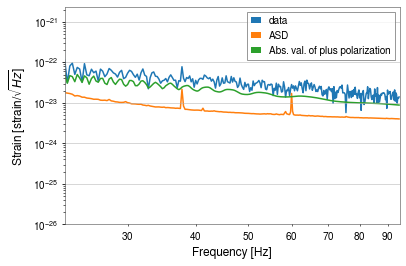

In [8]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [9]:
#17.411011265922482,19.441935582935383,21.7637640824031
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = 19.564163812778446
prior['mass_ratio'] = 0.9148936170212766
prior['eccentricity'] = bilby.core.prior.LogUniform(name='eccentricity', minimum=0.01, maximum=0.2)
prior["luminosity_distance"] = 200.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 45.0
prior["dec"] = 5.73

In [10]:
# Initialising the likelihood function.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [ ]:
result = bilby.run_sampler(likelihood=likelihood, priors=prior, sampler='dynesty', outdir='short', label="eccn", nlive=500, dlogz=3, npool=1)

07:58 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
07:58 bilby INFO    : Using lal version 7.1.2
07:58 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
07:58 bilby INFO    : Using lalsimulation version 2.5.1
07:58 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
07:58 bilby INFO    : Search parameters:
07:58 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.2, name='eccentricity', latex_label='eccentricity', unit=None, boundary=None)
07:58 bilby INFO    :   chirp_mass = 19.564163812778446
07:58 bilby INFO    :   mass_ratio = 0.9148936170212766
07:58 bilby INFO    :   luminosity_distance = 200.0
07:58 bilby INFO    :   theta_jn = 0.4
07:58 bilby INFO

0it [00:00, ?it/s]

08:03 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7ff3363c5c90>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
08:03 bilby INFO    : Checkpoint every check_point_delta_t = 600s
08:03 bilby INFO    : Using dynesty version 1.0.1
08:03 bilby INFO    : Generating initial points from the prior

714it [56:48, 10.60s/it, bound:0 nc:  1 ncall:2.2e+03 eff:32.9% logz-ratio=14376.35+/-0.16 dlogz:439.749>3]

In [28]:
H1 = ifos[0]
L1 = ifos[1]

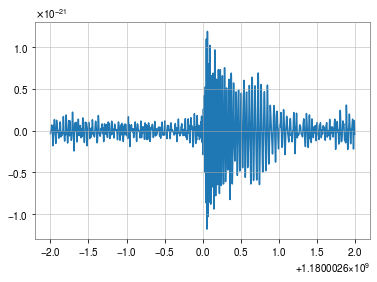

In [32]:
plt.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)

(1180002599.5, 1180002600.5)

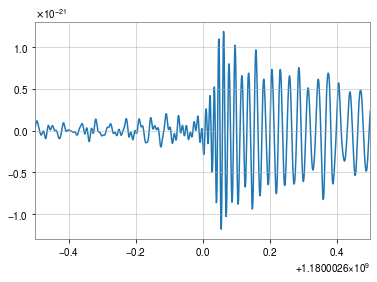

In [36]:
fig, ax = plt.subplots()
ax.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)
ax.set_xlim(1180002600.0-0.5,1180002600.0+0.5)

In [14]:
chirp_mass=19.564163812778446
mass_ratio=0.9148936170212766
mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)

In [15]:
mass_1

23.499999999999996

In [16]:
mass_2

21.499999999999993

In [5]:
23.499999999999996+21.499999999999993

44.999999999999986

In [9]:
#eta
(mass_1*mass_2)/((mass_1+mass_2)**2)

0.24950617283950624

In [21]:
#lso_f
(C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )

109.90044703536493

In [13]:
#delta
(mass_1-mass_2)*Mo

3.9780000000000077e+30

In [17]:
mass_1+mass_2

44.999999999999986

In [ ]:
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=17.411,maximum=21.764)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1)

In [20]:
chirp_mass=17.411
mass_ratio=1.0
mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
print(mass_1+mass_2)

39.999974117706756
